# Surprise Housing Case Study

## Table of Contents
0. [Business Goal](#business-goal)
1. [Data Understanding](#data-understanding)
2. [Exploratory Data Analysis](#exploratory-data-analysis)\
    2.1 [Univariate Analysis](#univariate-analysis)\
    2.2 [Bivariate Analysis](#bivariate-analysis)
3. [Data Preparation](#data-preparation)
4. [Model Building](#model-building)\
    4.1 [Ridge Regression](#ridge-regression)\
    4.2 [Lasso Regression](#lasso-regression)
5. [Model Comparison](#model-comparison)
6. [Observations](#observations)
7. [Doubling the Alpha of Ridge & Lasso Regression](#question-1)
8. [Removing the 5 Predictor Variables](#question---3)

## Business Goal

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. Attached is the csv dataset of the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. Goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:\
    - Which variables are significant in predicting the price of a house, and\
    - How well those variables describe the price of a house.

Goal is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Understanding

In [1]:
# Importing the basic libraries which are required for understanding data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
housing =pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Shape:", housing.shape)
print("Info:", housing.info())

Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

In [4]:
housing.describe([0.05,0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,

# Exploratory Data Analysis

#### Before Imputing NULL values

In [5]:
round((housing.isnull().sum()/len(housing.index))*100,2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

Around 19 features have NULL values in the data out of which 5 features have more than 50% NULL values

Categorical Columns of Original Dataset

In [6]:
cat_cols=housing.select_dtypes('object')
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# Imputing Null Values
#PoolQC, MiscFeature, Alley, Fence, MasVnrType - More than 50% Values are null hence filling the null values with 'None'
housing['PoolQC'] = housing['PoolQC'].fillna('None')
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
housing['Alley'] = housing['Alley'].fillna('None')
housing['Fence'] = housing['Fence'].fillna('None')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
#FireplaceQu - Values are almost distributed around 'Gd' & 'TA' hence filling the null values with 'None'
#housing['FireplaceQu'].value_counts()
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
#LotFrontage also distributed across (60.0 - 143/70.0-70) hence filling with 'None'
#housing['LotFrontage'].value_counts()
housing['LotFrontage'] = housing['LotFrontage'].fillna(0)
#GarageCond since has 1326 rows as 'TA' imputing the missing values as 'TA'
#housing['GarageCond'].value_counts()
housing['GarageCond'] = housing['GarageCond'].fillna('TA')
#Since GarageType is also distributed, imputing missing values with 'None'
#housing['GarageType'].value_counts()
housing['GarageType'] = housing['GarageType'].fillna('None')
#Since GarageFinish is also distributed, imputing missing values with 'None'
#housing['GarageFinish'].value_counts()
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
#GarageQual since has 1311 rows as 'TA' imputing the missing values as 'TA'
#housing['GarageQual'].value_counts()
housing['GarageQual'] = housing['GarageQual'].fillna('TA')
#GarageQual since has 1311 rows as 'TA' imputing the missing values as 'TA'
#housing['GarageQual'].value_counts()
housing['GarageQual'] = housing['GarageQual'].fillna('TA')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['Electrical'] = housing['Electrical'].fillna("Other")

basement_columns = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for col in basement_columns:
    housing[col] = housing[col].fillna('No Basement')


#### After Imputing NULL values

In [8]:
# After Imputing the Null values - Now no null values
round((housing.isnull().sum()/len(housing.index))*100,2).sort_values(ascending=False)

Id               0.0
CentralAir       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
HeatingQC        0.0
MSSubClass       0.0
Heating          0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

### Univariate Analysis

Dropping the Categorical Columns

In [9]:
#Since 99% of the data is single value, it wont impact the model hence dropping the column
housing.drop('Street',axis=1,inplace=True)
#Since below 5 features also has more than 90% single value, it wont impact the model hence dropping the column
housing.drop('CentralAir',axis=1,inplace=True)
housing.drop('PavedDrive',axis=1,inplace=True)
housing.drop('Utilities',axis=1,inplace=True)
housing.drop('RoofMatl',axis=1,inplace=True)
housing.drop('Heating',axis=1,inplace=True)
#Since below 2 features has max NULL values, dropping them also
housing.drop('PoolQC',axis=1,inplace=True)
housing.drop('MiscFeature',axis=1,inplace=True)

Final List of Categorical Columns after dropping the columns 

In [10]:
cat_cols=housing.select_dtypes('object')
cat_cols.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [11]:
# Creating a new Column to determine the age of the property
housing['age']=housing['YrSold']-housing['YearBuilt']
housing['garage_age'] = housing['YrSold'] - housing['GarageYrBlt']
housing['remodel_age'] = housing['YrSold'] - housing['YearRemodAdd']

housing.drop('Id',axis=1,inplace=True)

housing['YearBuilt_GarageYrBlt'] = housing['YearBuilt']-housing['GarageYrBlt'] 
#housing['YearBuilt_GarageYrBlt']=housing['YearBuilt_GarageYrBlt'].apply(lambda x: 0 if x == 0 else 1)
#housing['YearBuilt_GarageYrBlt'].value_counts()
# Since 1089 observations have Year Built & Garage Year built same, dropping 'GarageYrBlt' column
housing.drop('GarageYrBlt',axis=1,inplace=True)
housing.drop('YearBuilt_GarageYrBlt',axis=1,inplace=True)
#housing['Street'].value_counts()


Numerical Columns List - After initial Addition of Columns & Dropping basic columns 

In [12]:
num_cols=housing.select_dtypes(['int64','float64'])
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'age', 'garage_age', 'remodel_age'],
      dtype='object')

### Bivariate Analysis

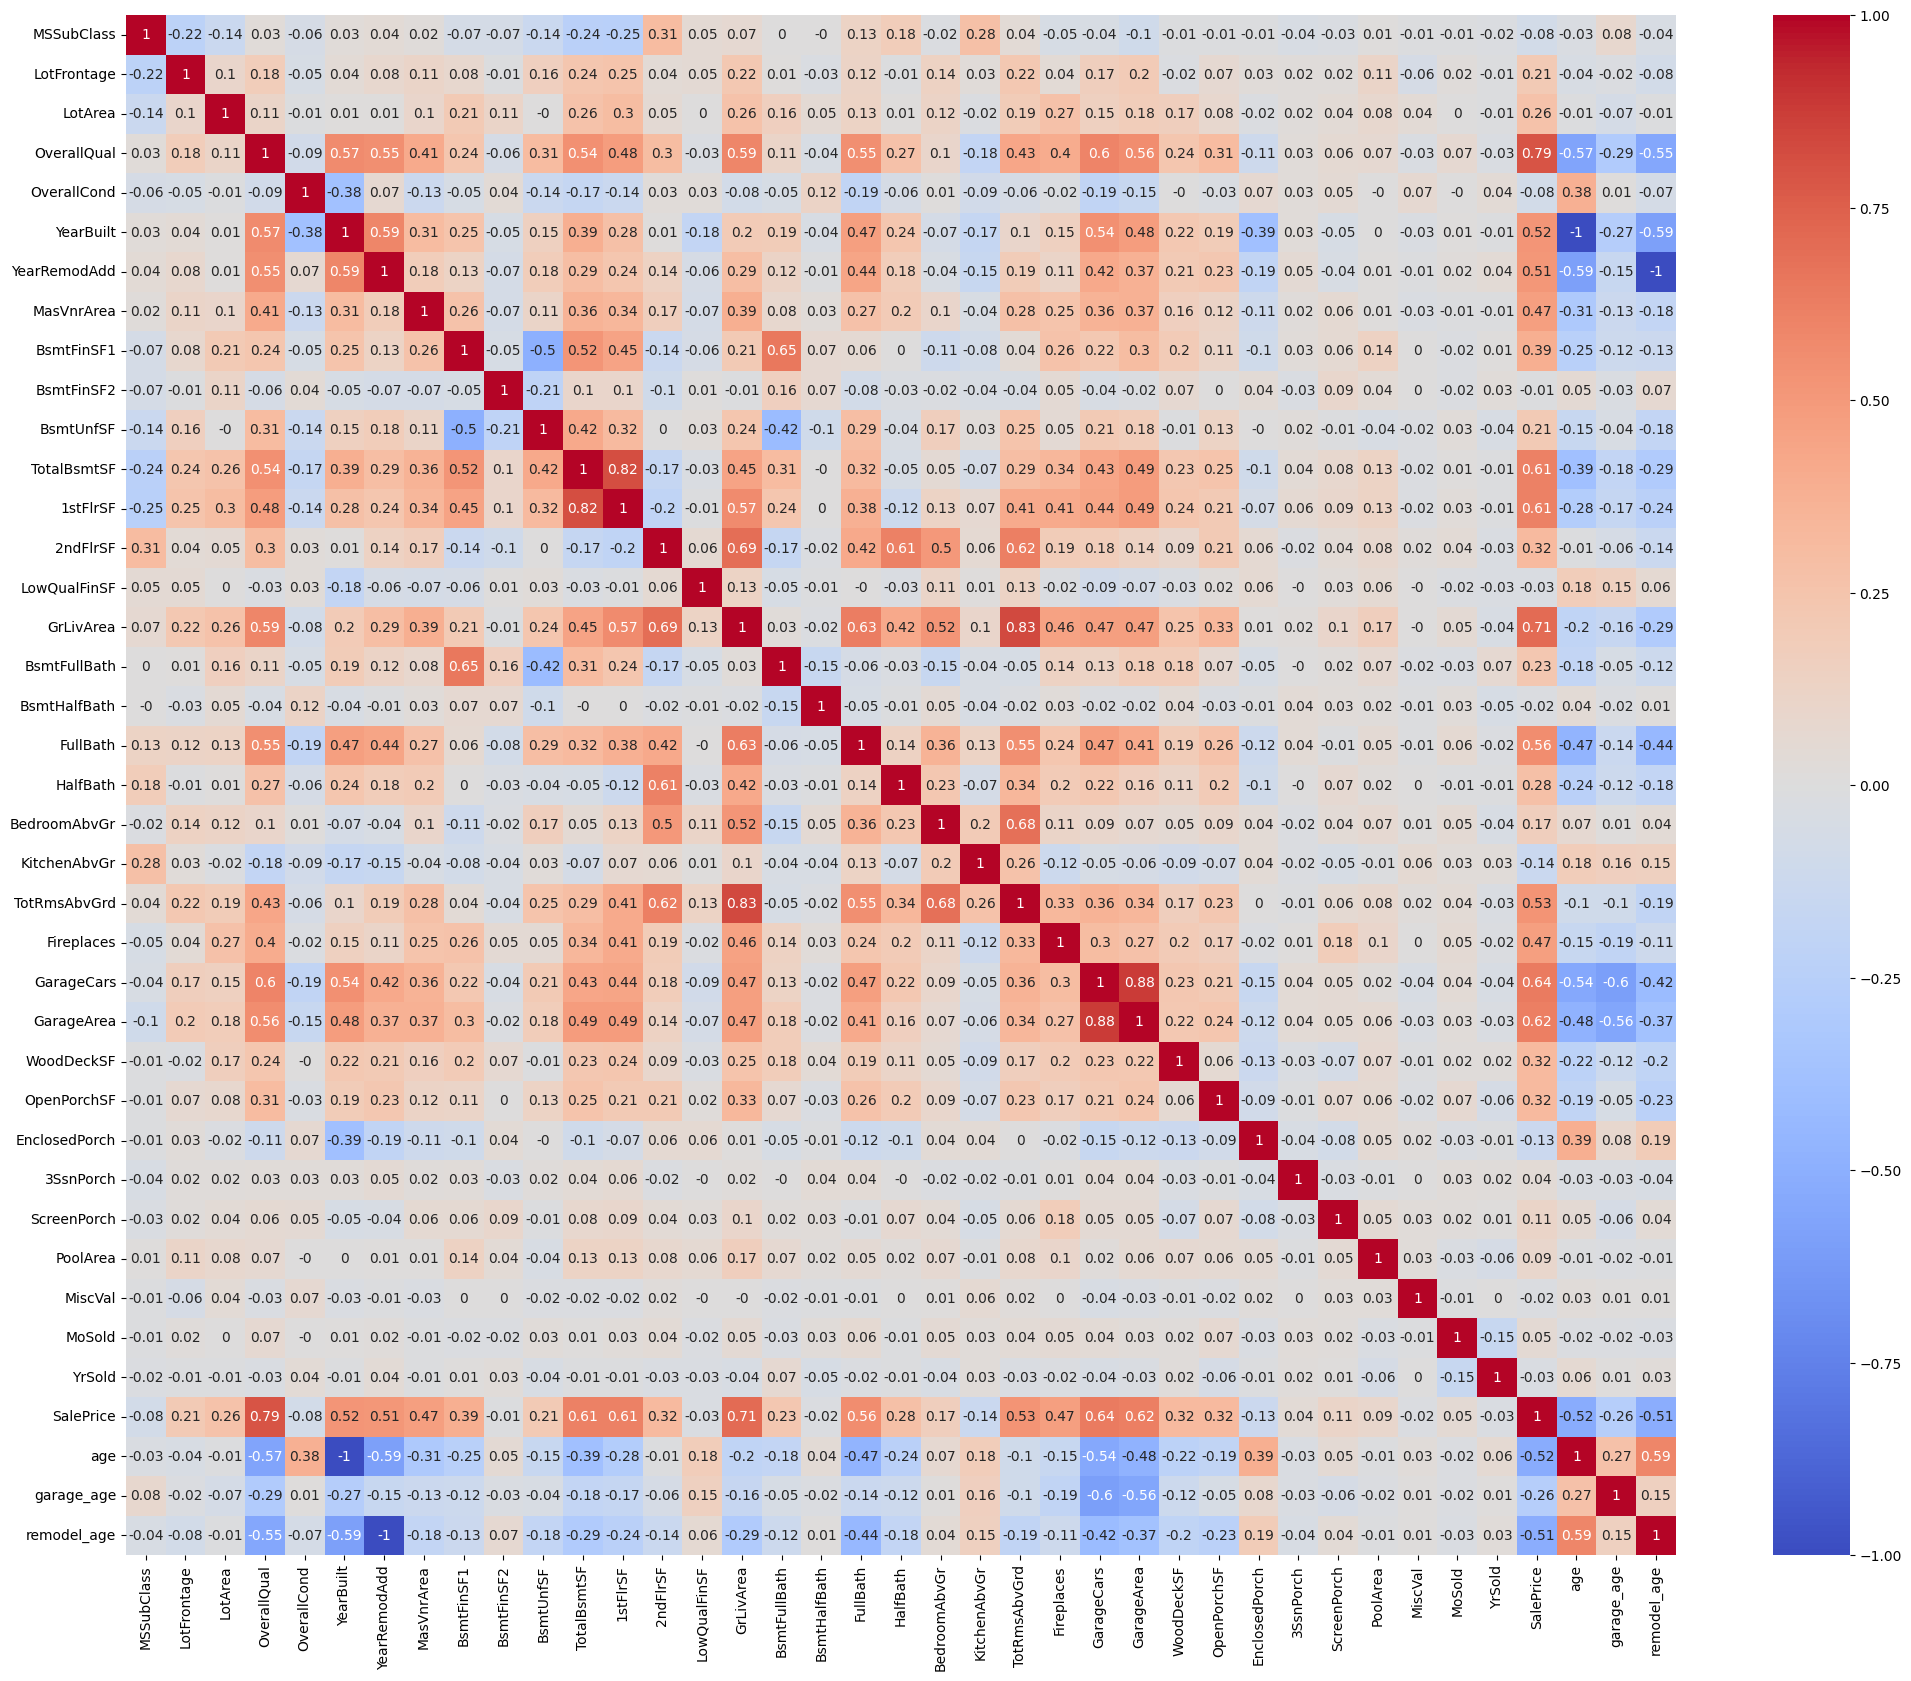

In [13]:
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(num_cols.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [14]:
#Since below 5 features are highly correlated we are dropping the 5 numerical features
housing.drop('GrLivArea',axis=1,inplace=True)
housing.drop('1stFlrSF',axis=1,inplace=True)
housing.drop('GarageArea',axis=1,inplace=True)
housing.drop('TotRmsAbvGrd',axis=1,inplace=True)
housing.drop('BsmtFinSF1',axis=1,inplace=True)

#Dropping below columns on which new columns are created
housing.drop('YearBuilt',axis=1,inplace=True)
housing.drop('YearRemodAdd',axis=1,inplace=True)

In [15]:
num_cols=housing.select_dtypes(['int64','float64'])
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'age', 'garage_age', 'remodel_age'],
      dtype='object')

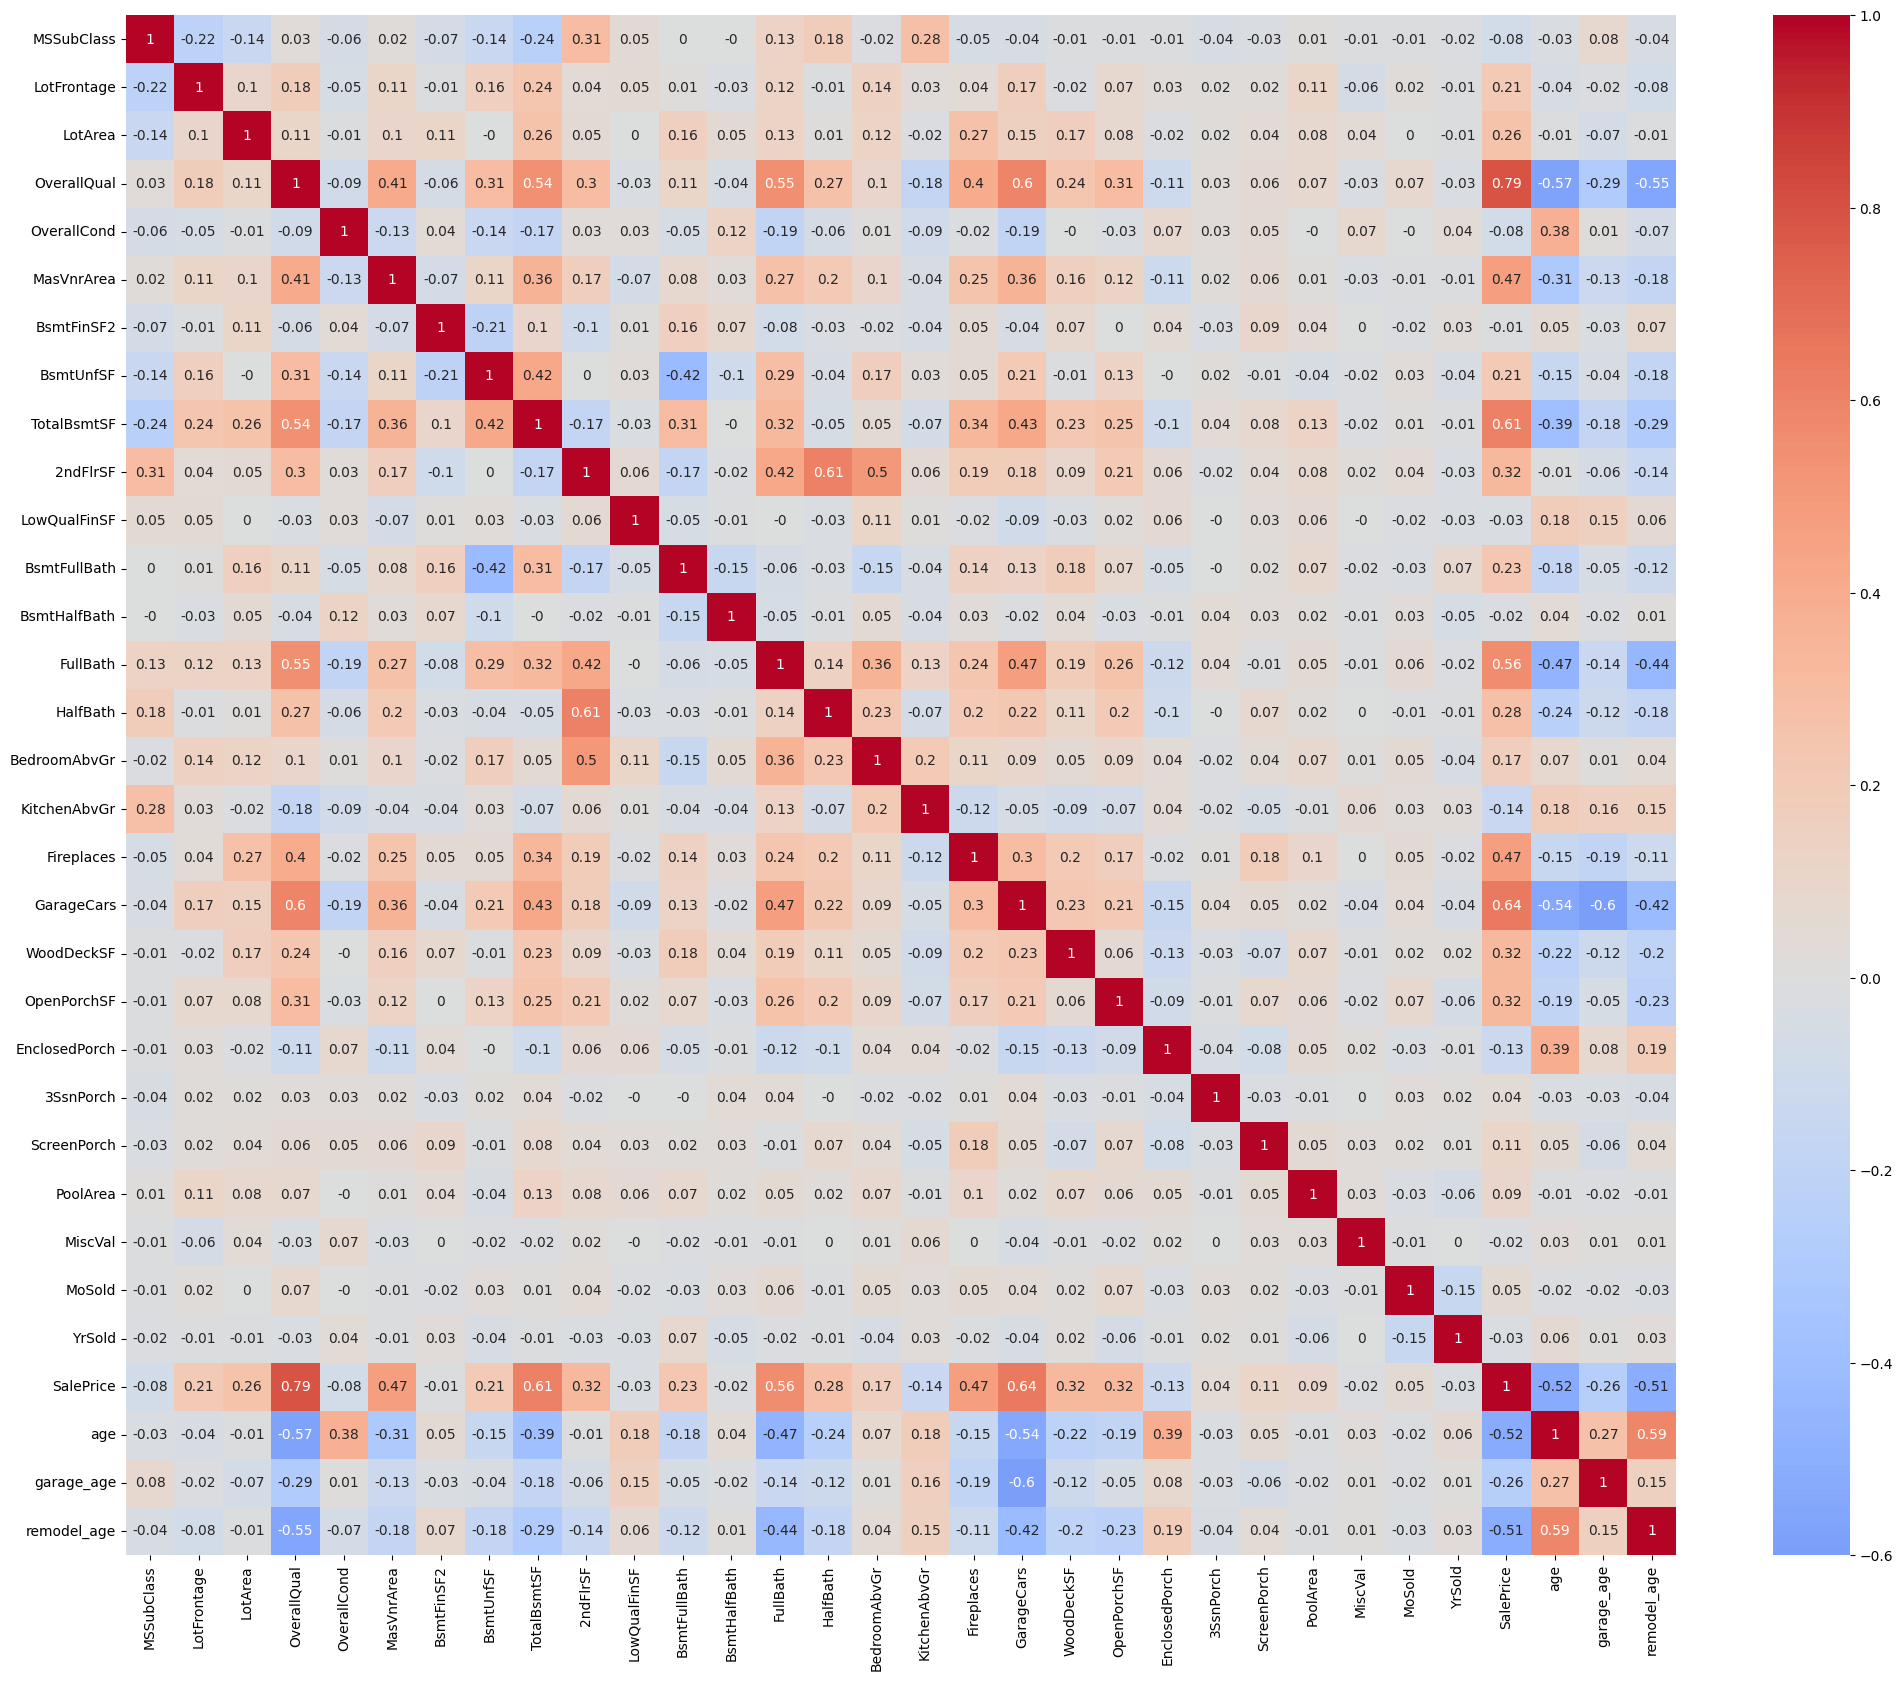

In [16]:
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(num_cols.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

Now all the major multi collinearity are removed from the numerical columns

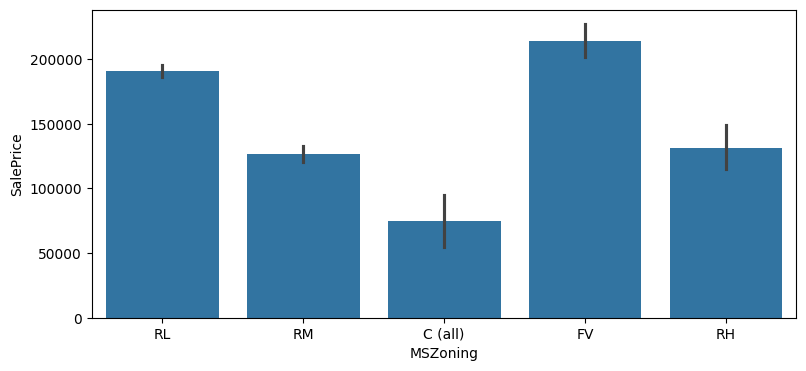

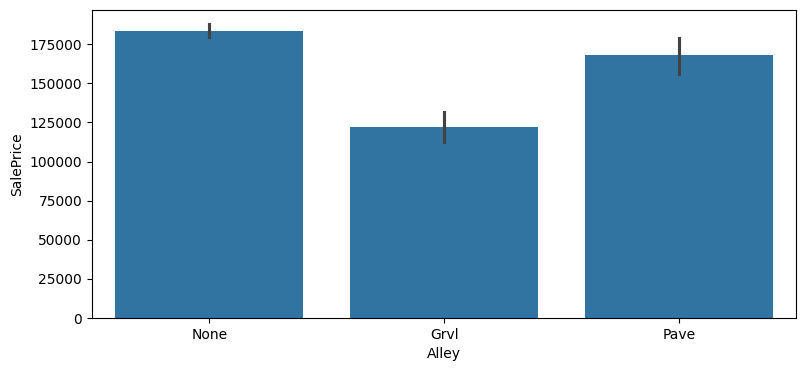

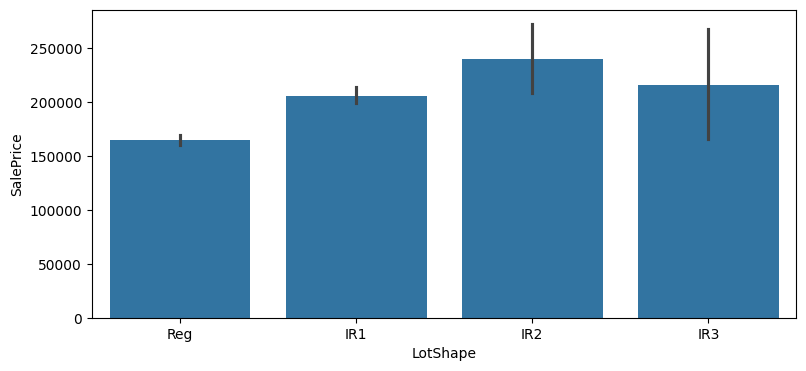

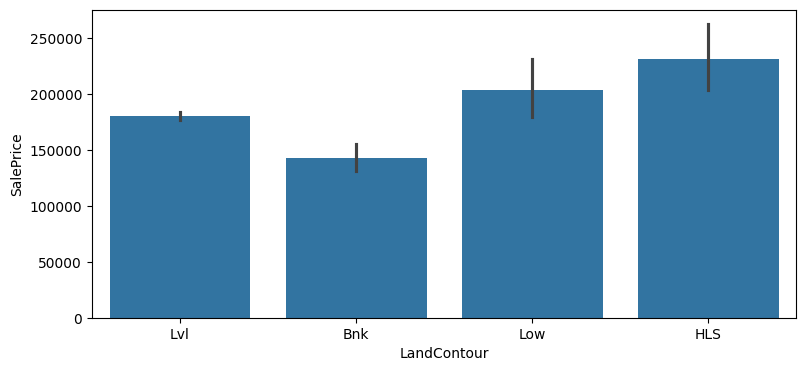

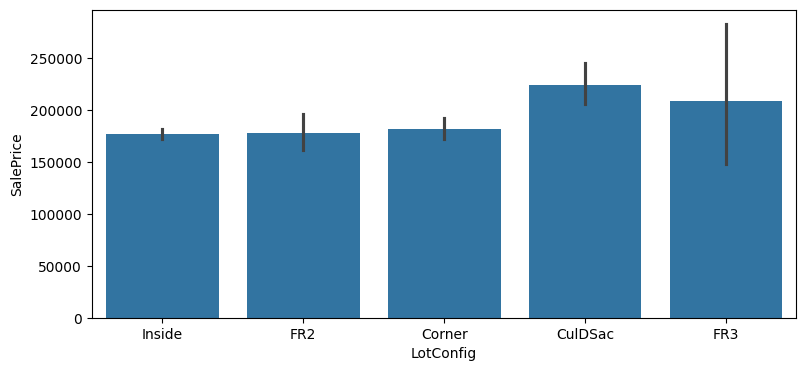

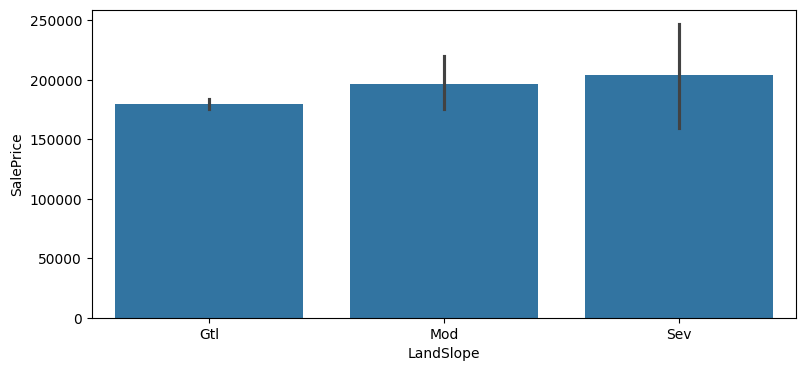

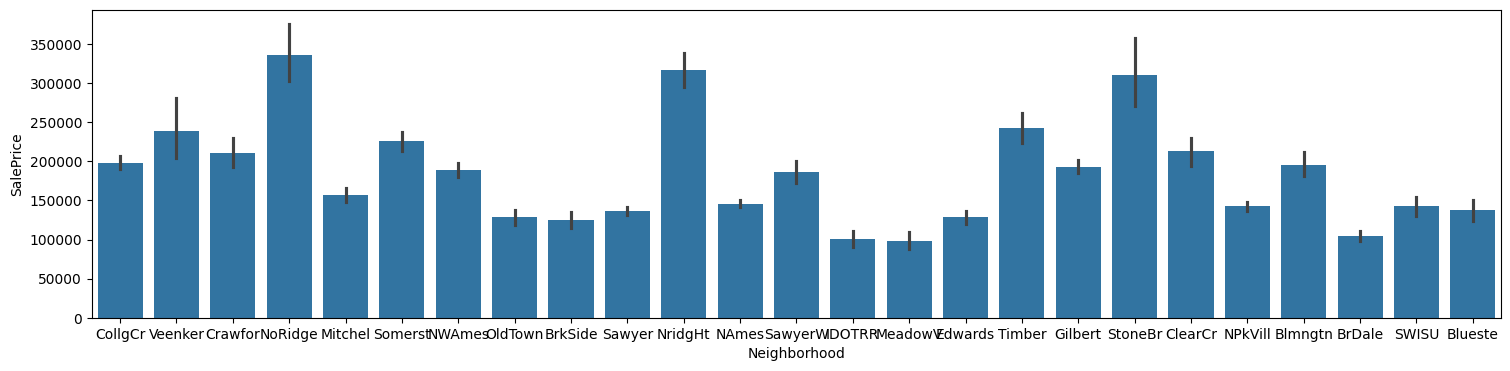

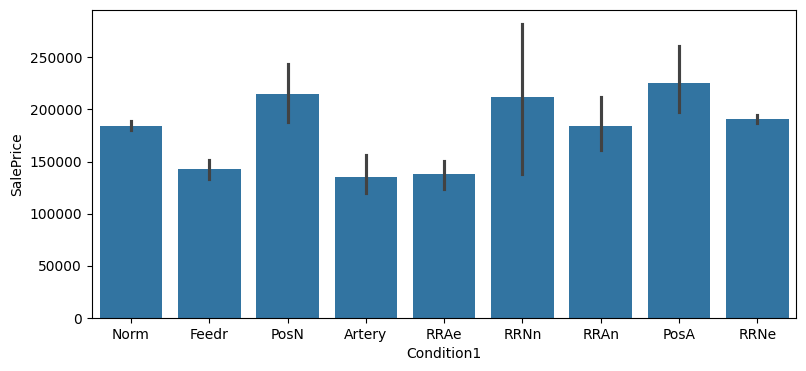

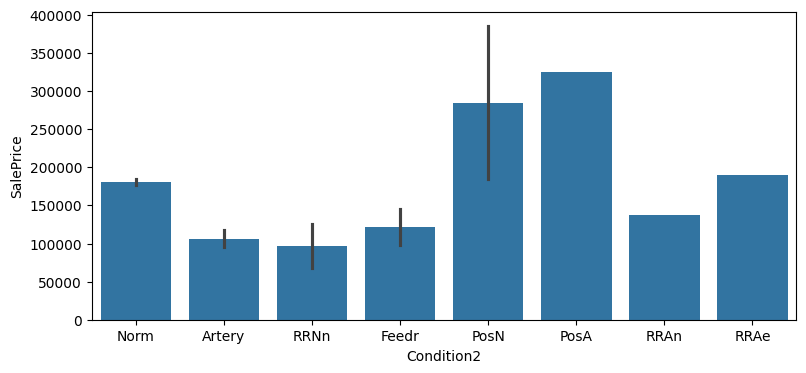

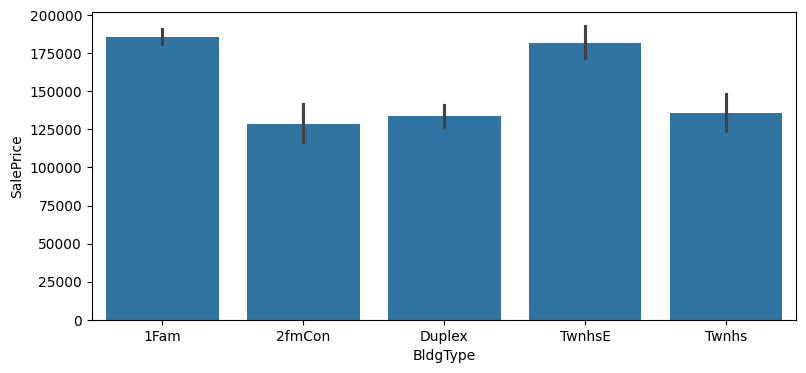

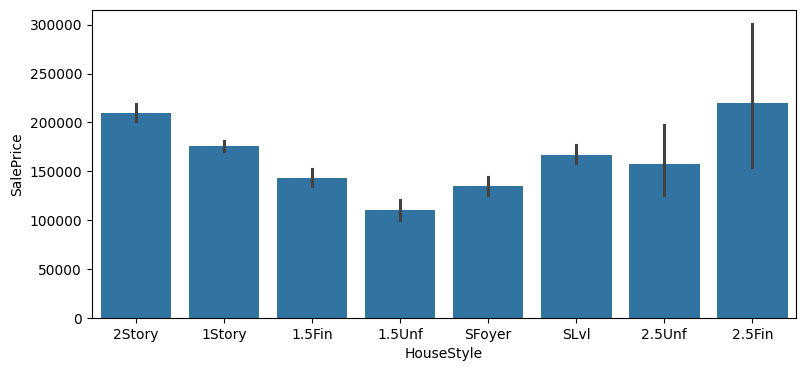

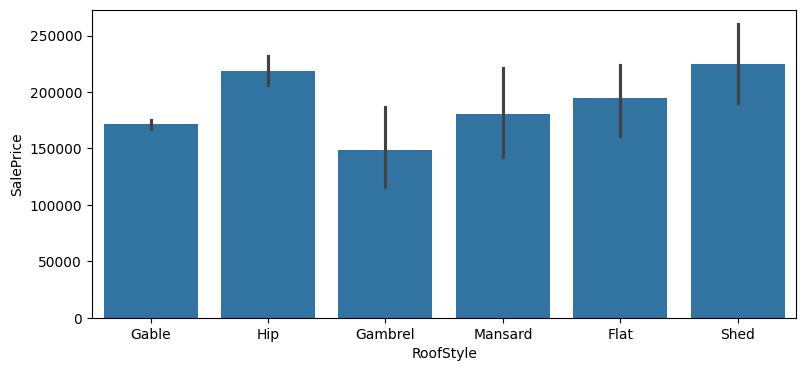

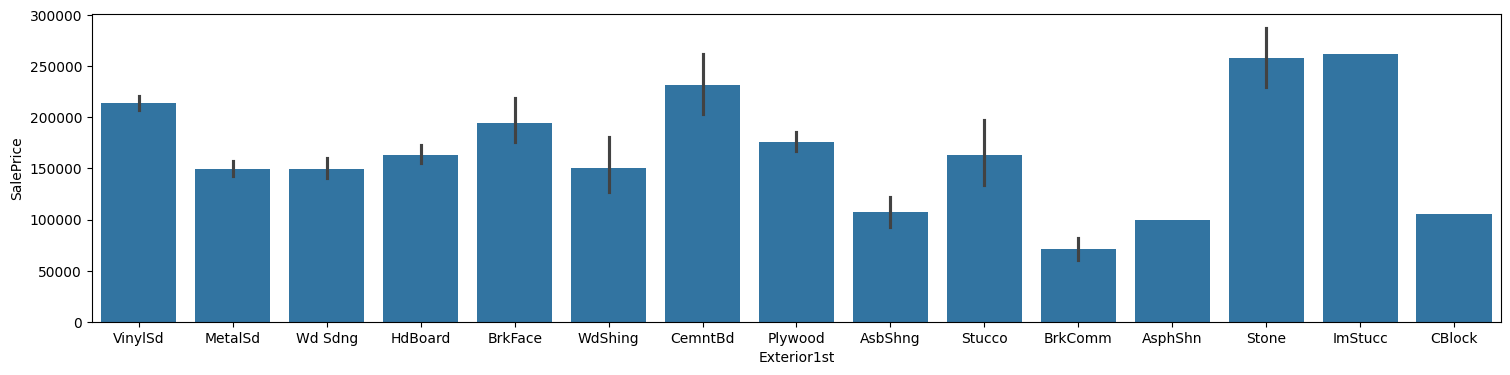

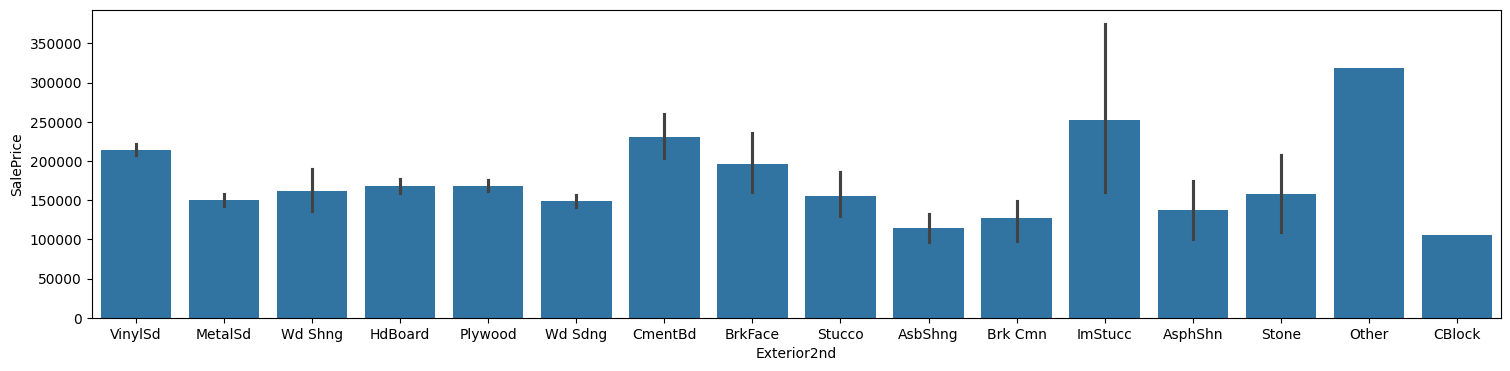

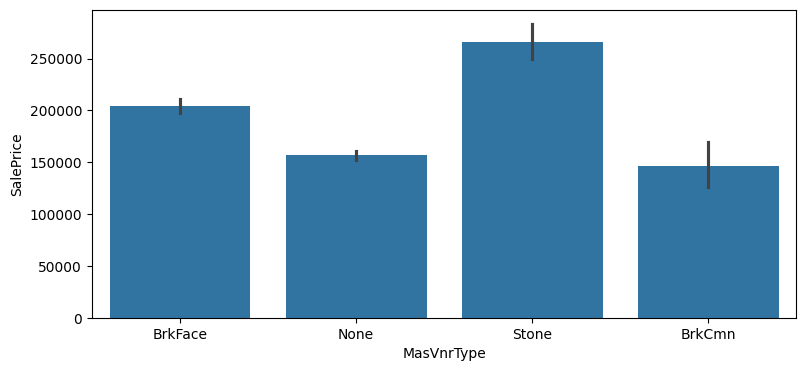

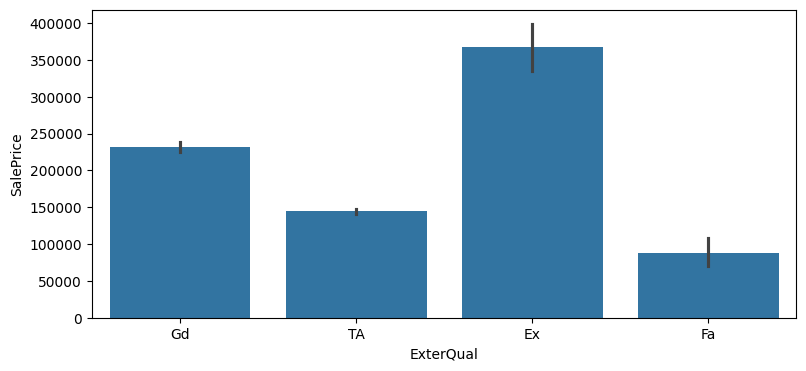

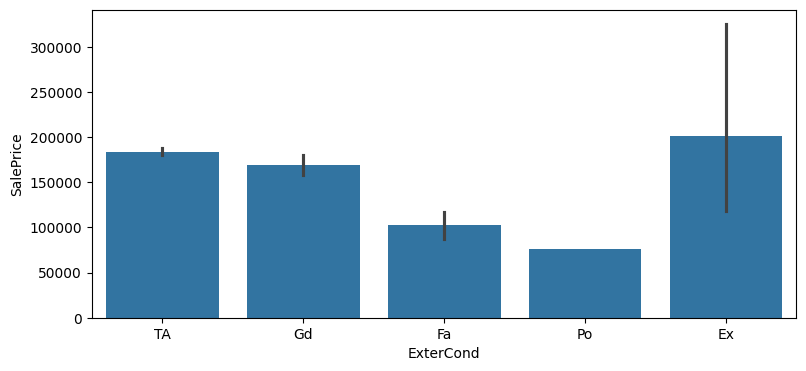

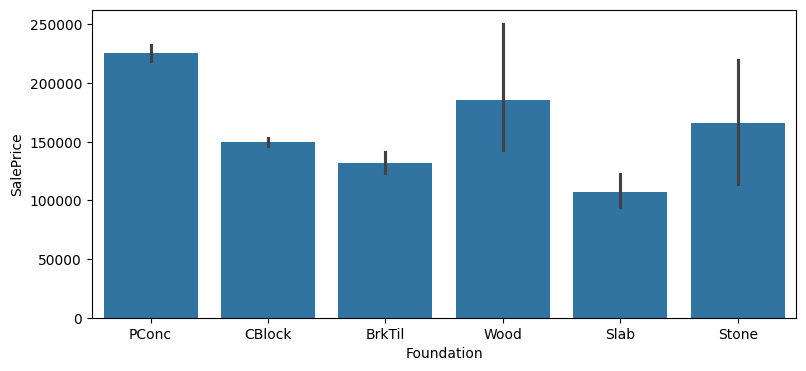

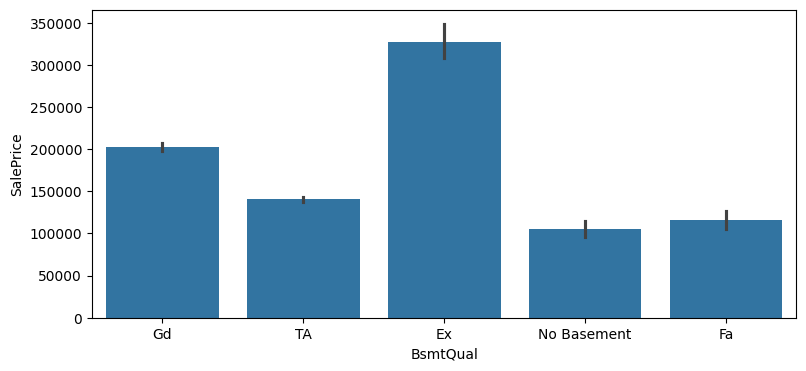

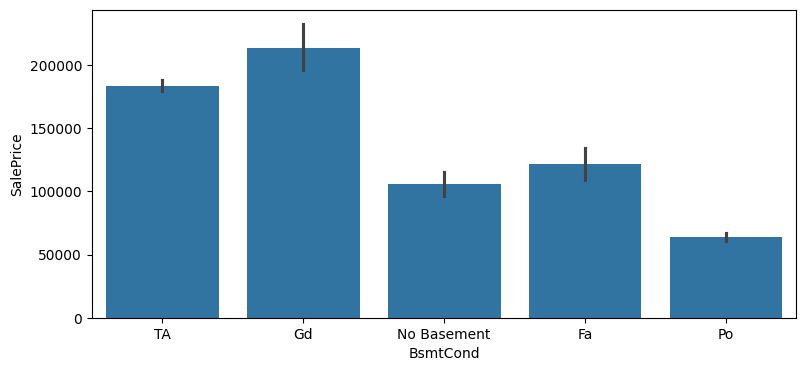

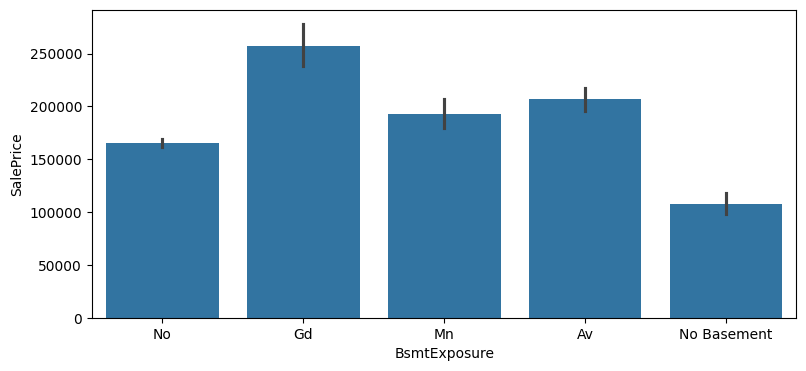

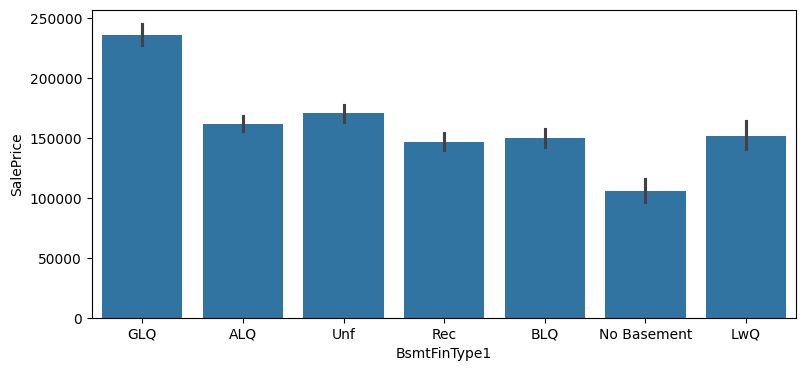

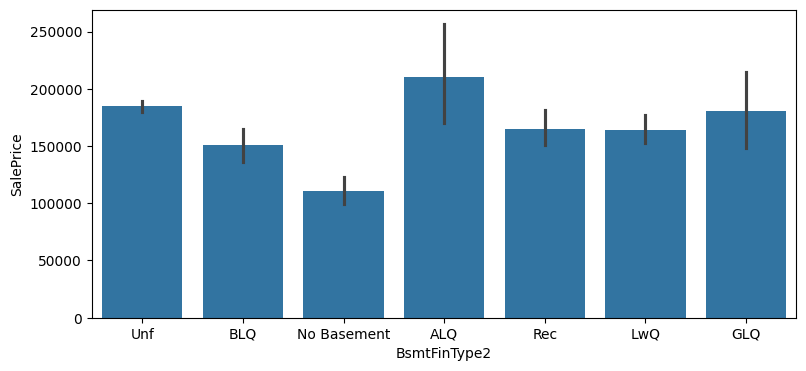

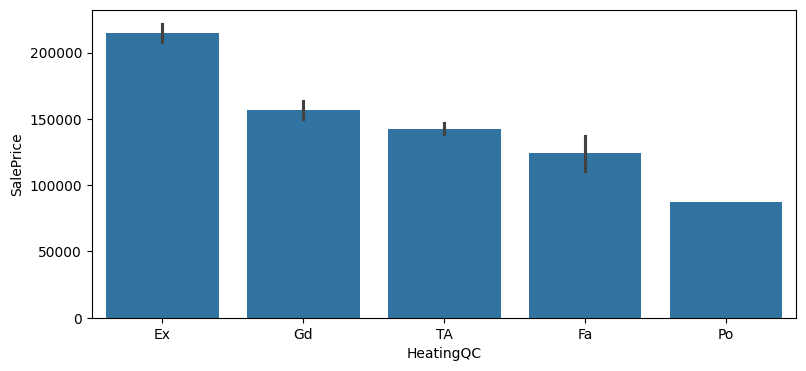

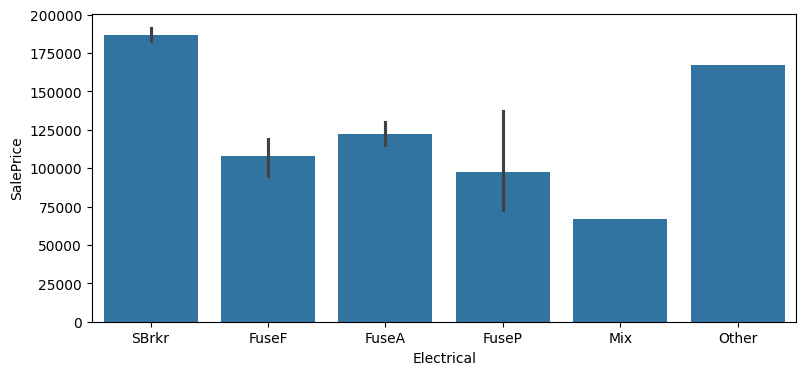

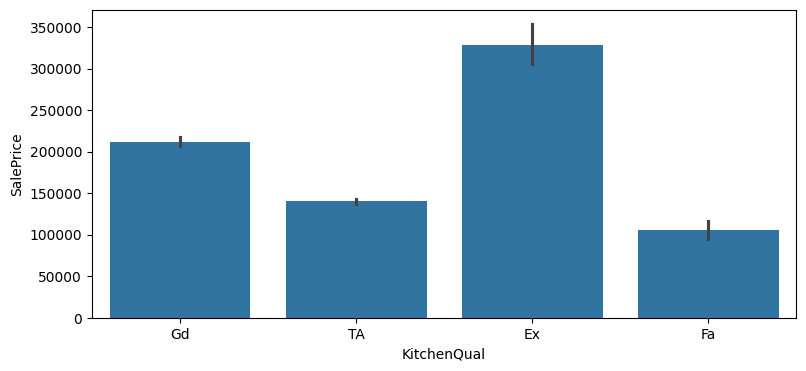

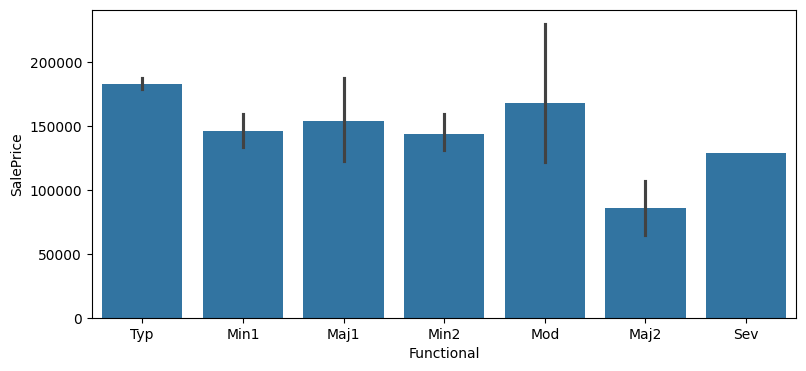

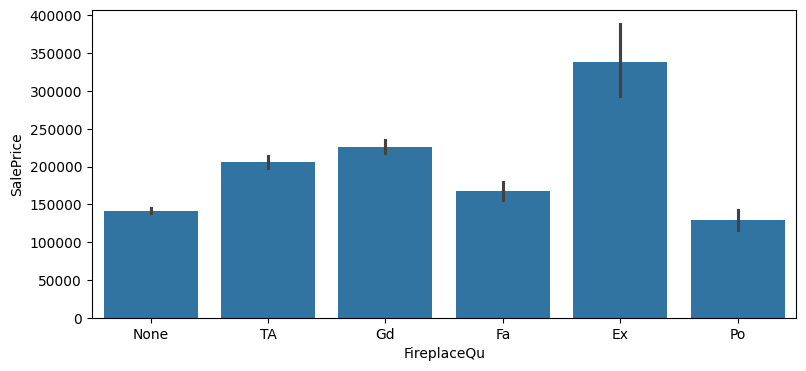

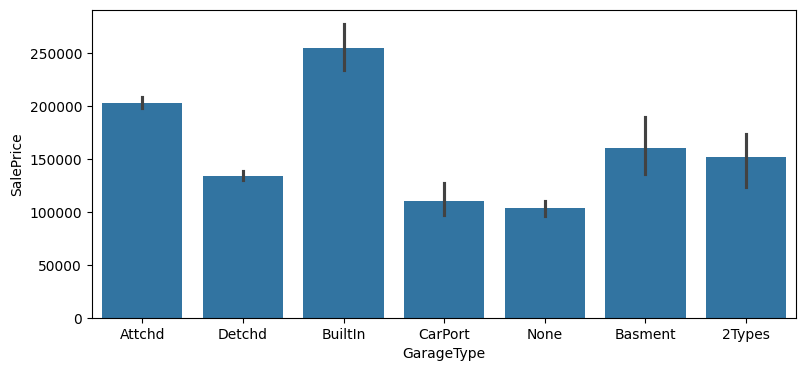

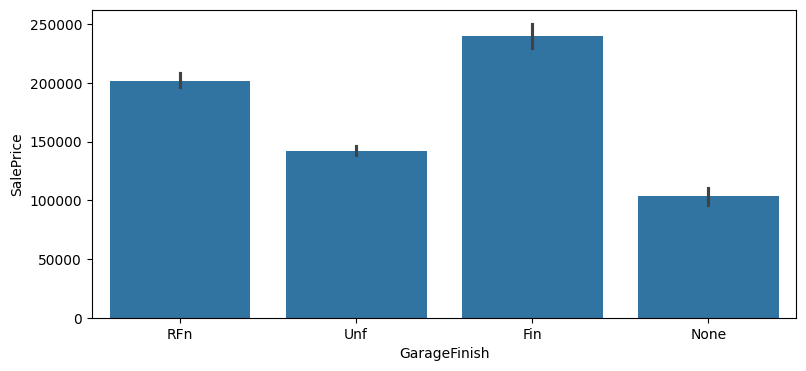

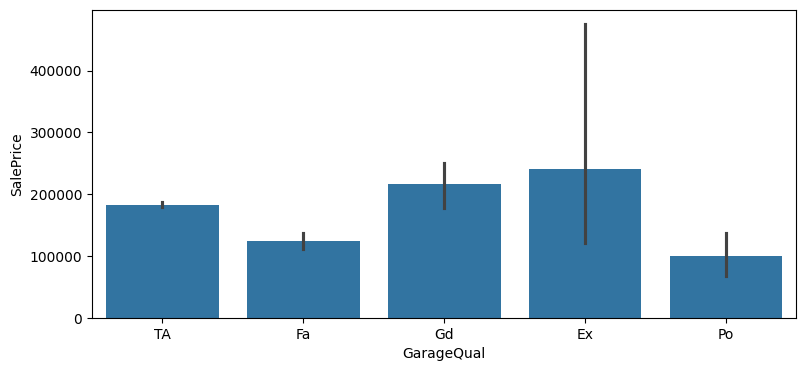

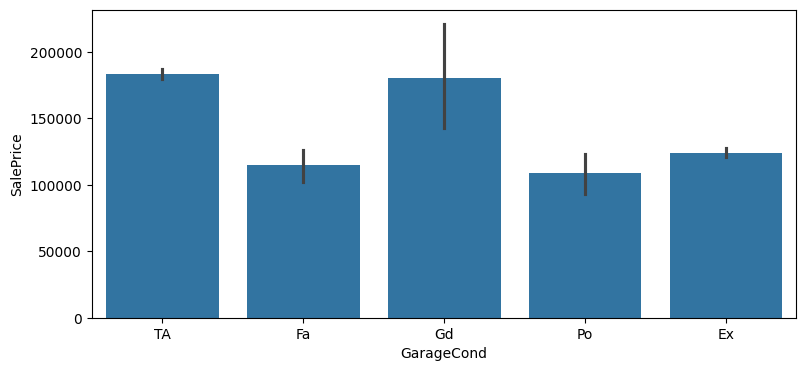

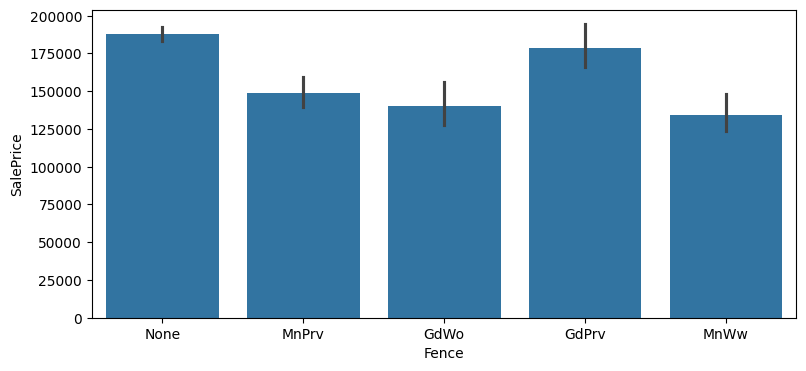

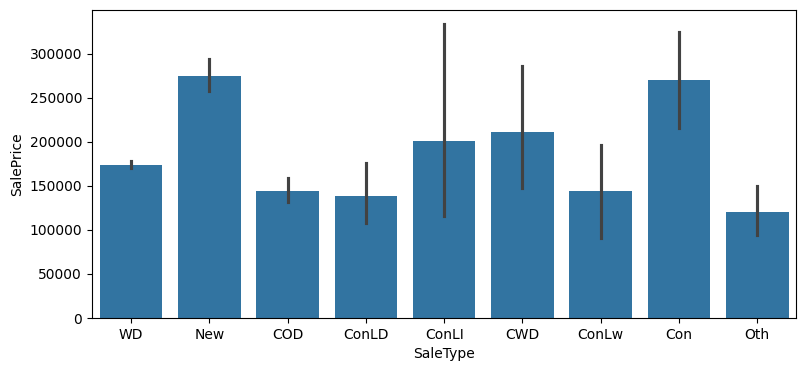

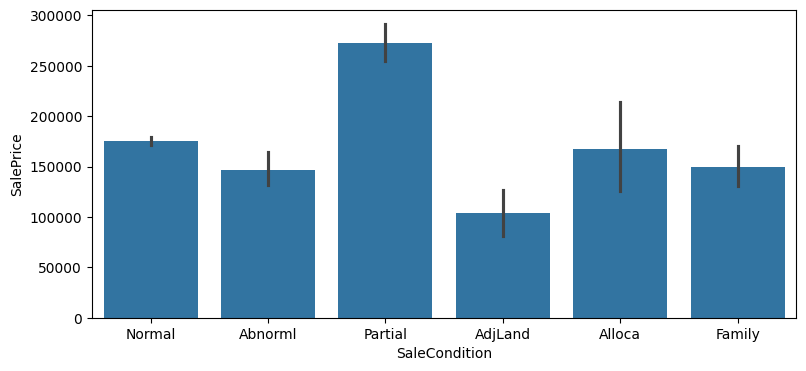

In [17]:
for feature in cat_cols:
    i=1
    if feature in ['Neighborhood','Exterior1st','Exterior2nd']:
        plt.figure(figsize=(40,4))
    else:
        plt.figure(figsize=(20,4))
    plt.subplot(1,2,i)
    sns.barplot(data=housing, x=feature, y='SalePrice')
    plt.show()

#### Data Preparation

In [18]:
housing_data_dummies = pd.get_dummies(cat_cols, drop_first=True).astype(int)
housing_data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,

In [19]:
housing = housing.drop(list(cat_cols), axis=1)
housing = pd.concat([housing,housing_data_dummies], axis=1)

In [20]:
housing.shape

(1460, 230)

In [21]:
y=housing.pop('SalePrice')
X=housing

In [22]:
y.shape

(1460,)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,train_size=0.7,random_state=100)

print("X_Train:",X_Train.shape)
print("X_Test:",X_Test.shape)
print("y_Train:",y_Train.shape)
print("y_Test:",y_Test.shape)

X_Train: (1021, 229)
X_Test: (439, 229)
y_Train: (1021,)
y_Test: (439,)


In [24]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_Test)

#### Model Building

In [25]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_Train)

LinearRegression()

In [26]:
# Print the coefficients and intercept
print(reg.intercept_)
print(reg.coef_)

18145.596474045044
[ 2.29926869e+03 -2.03719787e+04  1.64046029e+05  8.91129283e+04
  3.21047507e+04  2.88374184e+04  7.80205842e+03  7.00396764e+03
  1.95720586e+05  1.56387221e+05  1.39652933e+04  2.22789979e+04
  4.41371529e+03  3.04826776e+04  5.97632863e+03  1.52087667e+03
 -1.15339601e+04  4.45647245e+02  5.64065716e+04  1.32947609e+04
  1.38990959e+03  3.35970878e+03  2.22849669e+04  7.59208404e+03
 -2.00551636e+04 -1.41235307e+04 -1.09718286e+03 -5.35023612e+03
 -1.14558986e+04  2.13014123e+05 -9.82830701e+03  2.81787883e+04
  3.23120982e+04  2.93925572e+04  2.73482656e+04 -3.36519485e+03
 -7.25123595e+03  5.60457235e+01 -4.28203586e+04  2.09988822e+03
  1.11058059e+04  1.07961596e+04  1.41905814e+04  9.02671413e+03
 -1.70068938e+04 -1.07544474e+04 -1.80617149e+03  4.15679610e+03
 -2.43924079e+04 -6.60080739e+03  8.50483976e+03  8.43200187e+02
 -3.07143932e+03  1.77681240e+03  3.14942380e+04 -1.30295330e+04
  1.47110735e+03 -2.93751451e+03 -4.31865964e+03 -1.58276372e+04
 -2.60

In [27]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

lr_metric = []
r2_train_lr = r2_score(y_Train, y_pred_train)
print(r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_Test, y_pred_test)
print(r2_test_lr)
lr_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_Train - y_pred_train))
print(rss1_lr)
lr_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_Test - y_pred_test))
print(rss2_lr)
lr_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_Train, y_pred_train)
print(mse_train_lr)
lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_Test, y_pred_test)
print(mse_test_lr)
lr_metric.append(mse_test_lr**0.5)

0.906981341454245
-2.4007659757621997e+22
593631730961.3757
6.783904773426856e+34
581421871.6565874
1.545308604425252e+32


#### Ridge Regression

In [28]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_Train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [29]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 6.0}
-20358.50045856309


In [69]:
#Fitting Ridge model for alpha = 6.0 and printing coefficients which have been penalised
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_Train)
print(ridge.coef_)

[-24684.89746762   9769.54766926  28764.40848497  20382.07210289
  46363.88961144   7664.27839215  34539.00387661  -2841.46869081
  27866.00769891   1985.54523541  60721.42234661  24662.30281333
  33416.38446     -1729.82565104  23931.95229081  22401.22876857
   8285.61283397   2514.80374763   9715.62964497   3973.68592573
  15779.12118978   -947.14265843   -612.75265673  -4482.49320266
  -5349.89755947  -7959.09318966 -15617.13159119   1228.13628896
  10000.78021426  10387.64091178   5669.83933441    803.54858053
   2633.56919925    205.18632236  -9901.04701961  -2032.84907684
   8649.32959652  17167.58371742  13070.71866191  10560.70024967
 -15699.53058705  -5371.39116987  -5013.83497403   4157.38349801
  -1369.11899984  -3002.00744469  -7111.19881217 -11566.17986296
  -7544.69908346 -23102.24324847  16400.79534817 -28249.43928187
 -33676.15165974 -19893.18145688 -13472.54944974 -23077.07674145
 -16074.44544056   1255.26097908 -12480.66453939  13868.88492979
 -12862.37554299  -6776.5

In [31]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_Train, y_pred_train)
print(r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_Test, y_pred_test)
print(r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_Train - y_pred_train))
print(rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_Test - y_pred_test))
print(rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_Train, y_pred_train)
print(mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_Test, y_pred_test)
print(mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

0.880418596163863
0.8505199985906726
763151359736.2765
422389397938.1495
747454808.7524745
962162637.6723223


#### Lasso Regression

In [32]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_Train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 100}
-19585.689355848102


In [34]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =100
lasso = Lasso(alpha=alpha)   
lasso.fit(X_train, y_Train) 

Lasso(alpha=100)

In [35]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_Train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_Test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_Train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_Test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_Train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_Test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.8893336967711188
0.8487006628500013
706256466948.9662
427530340679.0123
691730134.1321902
973873213.3918276


#### Model Comparison

In [36]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': lr_metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.069813e-01,8.804186e-01,8.893337e-01
1,R2 Score (Test),-2.400766e+22,8.505200e-01,8.487007e-01
2,RSS (Train),5.936317e+11,7.631514e+11,7.062565e+11
3,RSS (Test),6.783905e+34,4.223894e+11,4.275303e+11
4,MSE (Train),2.411269e+04,2.733962e+04,2.630076e+04
5,MSE (Test),1.243104e+16,3.101875e+04,3.120694e+04


#### Observations
Changes in the Coefficients

In [37]:
betas = pd.DataFrame(index=X.columns)

In [38]:
betas.rows = X.columns

In [39]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [40]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
MSSubClass,2.299269e+03,-19173.891664,-22520.707183
LotFrontage,-2.037198e+04,693.248878,-0.000000
LotArea,1.640460e+05,23853.519590,44890.952953
OverallQual,8.911293e+04,67320.691079,108595.060632
OverallCond,3.210475e+04,21110.914823,27532.137073
MasVnrArea,2.883742e+04,26922.264067,23376.337407
BsmtFinSF2,7.802058e+03,7413.014622,0.000000
BsmtUnfSF,7.003968e+03,22916.307474,9533.110469
TotalBsmtSF,1.957206e+05,37135.275190,142119.813754
2ndFlrSF,1.563872e+05,64661.044910,109565.201362


Now, we look at the most important predictor variables

In [41]:
betas

,Linear,Ridge,Lasso
MSSubClass,2.299269e+03,-19173.891664,-22520.707183
LotFrontage,-2.037198e+04,693.248878,-0.000000
LotArea,1.640460e+05,23853.519590,44890.952953
OverallQual,8.911293e+04,67320.691079,108595.060632
OverallCond,3.210475e+04,21110.914823,27532.137073
MasVnrArea,2.883742e+04,26922.264067,23376.337407
BsmtFinSF2,7.802058e+03,7413.014622,0.000000
BsmtUnfSF,7.003968e+03,22916.307474,9533.110469
TotalBsmtSF,1.957206e+05,37135.275190,142119.813754
2ndFlrSF,1.563872e+05,64661.044910,109565.201362


In [42]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual             67320.691079
2ndFlrSF                64661.044910
Neighborhood_NoRidge    48726.046317
GarageCars              43061.017815
FullBath                41200.840035
TotalBsmtSF             37135.275190
MasVnrArea              26922.264067
BsmtFullBath            25481.526620
Neighborhood_NridgHt    24170.832998
LotArea                 23853.519590
Name: Ridge, dtype: float64

In [43]:
betas['Lasso'].sort_values(ascending=False)[:10]

TotalBsmtSF             142119.813754
2ndFlrSF                109565.201362
OverallQual             108595.060632
Neighborhood_NoRidge     52311.712593
GarageCars               46627.803282
LotArea                  44890.952953
FullBath                 33380.433887
OverallCond              27532.137073
Neighborhood_Crawfor     26944.769136
Neighborhood_NridgHt     25720.316111
Name: Lasso, dtype: float64

#### Question 1
Doubling the Alpha values of Ridge & Lasso Regressions

In [46]:
#Fitting Ridge model for alpha = 12.0 and printing coefficients which have been penalised
alpha = 12.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_Train)

Ridge(alpha=12.0)

In [47]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha =200
lasso = Lasso(alpha=alpha)   
lasso.fit(X_train, y_Train) 

Lasso(alpha=200)

In [50]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [51]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual             54578.985716
2ndFlrSF                48337.593181
Neighborhood_NoRidge    44034.761607
GarageCars              37532.170424
FullBath                37151.863400
TotalBsmtSF             27280.507886
MasVnrArea              22945.610252
Neighborhood_NridgHt    22230.418601
BsmtExposure_Gd         22028.522321
BsmtUnfSF               20831.326169
Name: Ridge, dtype: float64

In [52]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual             118185.963656
TotalBsmtSF             116123.635555
2ndFlrSF                 93730.463562
Neighborhood_NoRidge     53672.553264
GarageCars               47962.160509
FullBath                 30950.565654
Neighborhood_NridgHt     25747.749517
BsmtFullBath             25189.420513
BsmtExposure_Gd          23779.393500
Neighborhood_Crawfor     23358.789217
Name: Lasso, dtype: float64

#### Question - 3
Removing the 5 Predictor Variables

In [54]:
X=housing.drop(['TotalBsmtSF','2ndFlrSF','OverallQual','Neighborhood_NoRidge','GarageCars'],axis=1)
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,train_size=0.7,random_state=100)

print("X_Train:",X_Train.shape)
print("X_Test:",X_Test.shape)
print("y_Train:",y_Train.shape)
print("y_Test:",y_Test.shape)


X_Train: (1021, 224)
X_Test: (439, 224)
y_Train: (1021,)
y_Test: (439,)


In [55]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_Test)

Ridge

In [58]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_Train) 

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_Train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 7.0}
-23304.196991092595
{'alpha': 100}
-23466.499229820864


In [62]:
#Fitting Ridge model for alpha = 0.1 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_Train)

Ridge(alpha=7.0)

In [63]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =100
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_Train)

Lasso(alpha=100)

In [66]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [67]:
betas['Ridge'].sort_values(ascending=False)[:10]

FullBath               58706.840965
MasVnrArea             43941.528715
BsmtUnfSF              33588.018561
BedroomAbvGr           31840.194555
BsmtFullBath           26570.571548
LotArea                25868.400580
HalfBath               24127.119714
BsmtExposure_Gd        24082.714694
Fireplaces             23471.958506
Exterior2nd_ImStucc    23054.049392
Name: Ridge, dtype: float64

In [68]:
betas['Lasso'].sort_values(ascending=False)[:10]

FullBath               80410.213364
LotArea                77677.921172
MasVnrArea             73143.339963
BedroomAbvGr           40589.334663
BsmtUnfSF              37585.198062
BsmtFullBath           33553.860766
Exterior2nd_ImStucc    33372.265870
HalfBath               32919.192463
OverallCond            26769.004336
BsmtExposure_Gd        25102.448563
Name: Lasso, dtype: float64